In [1]:
# Import the data set
from keras.datasets import imdb
import nltk
#nltk.download('punkt')
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction.text import CountVectorizer
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

# split the data set into training and testing target-data
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data()

# get all the words already tokenized(remember that the words are unique, each having an ID) -> returns a dictionary
# remember that words are still dirt, many contain numbers and symbols
index = imdb.get_word_index()
# reverse key-value pair in dictionary
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [2]:
# STEP 1: decode all the sentences
# extract all the sentences from training data and test data decoded
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

decoded_sentences = []
# extract from training data
for x in range(len(data)):
    decoded_sentences.append(" ".join([reverse_index.get(i - 3, "") for i in data[x]]))

## TFIDF

In [3]:
# vectorize sentences
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(decoded_sentences).toarray()

In [4]:
# creating data frame and appending labels so to extract a normal distribution
labels = pd.DataFrame(targets)
dataset_frame = pd.DataFrame(data=X)
dataset_frame['Class'] = labels

#dataset_frame

In [5]:
dataset_frame_reduced = dataset_frame.iloc[:5000,:]

In [6]:
dataset_frame_reduced

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,Class
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.138782,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.073118,0.0,0.084114,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.181806,0.0,0.0,0
4996,0.0,0.0,0.0,0.11681,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0
4997,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.029641,0.0,0.034099,0.0,0.0,0.0,0.000000,0.0,0.0,1
4998,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.112374,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [7]:
# take half positive and half negative
bound = 1000
reviews_negative = dataset_frame_reduced[dataset_frame_reduced['Class'] == 0].iloc[:bound,:]
reviews_positive = dataset_frame_reduced[dataset_frame_reduced['Class'] == 1].iloc[:bound,:]
#extract a normal distribution according to an upper bound
reviews = reviews_negative.append(reviews_positive, ignore_index = True) 
#reviews

In [8]:
from sklearn.model_selection import train_test_split
#train
X_train, X_test, y_train, y_test = train_test_split(reviews.iloc[:,:-1], reviews.iloc[:,(len(reviews.columns) -1):], test_size=0.1, random_state=0)

tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)#The accuracy is then calculated through the score function offered by sklearn
print("The prediction accuracy is: ",tree.score(X_test,y_test)*100,"%")


The prediction accuracy is:  69.0 %


In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#y_test.loc[y_test['Class'] == 0]
#y_test.loc[y_test['Class'] == 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Average of the list = 68.0 %


Text(0.5, 1.0, 'Average score: 0.6755')

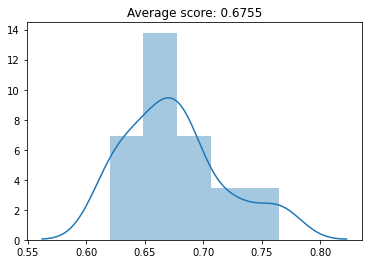

In [9]:
# try with k folds
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
k_folds = cross_val_score(clf, reviews.iloc[:,:-1], reviews.iloc[:,(len(reviews.columns) -1):], cv=10)

# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 
  
# Driver Code 
average = Average(k_folds) 
  
# Printing average of the list 
print("Average of the list =", round(average, 2) * 100 , "%")

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(k_folds)
plt.title('Average score: {}'.format(np.mean(k_folds)))

In [ ]:
# display tree
import io
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = io.StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
print(tfidfconverter.get_feature_names()[51247])